In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Fraud_data=pd.read_csv("D:\Accredian_assignment_internship\Fraud .csv")

In [3]:
Fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# summary of dataset
Fraud_data.info()
Fraud_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [24]:
# statistical summary of dataset
Fraud_data.describe()
Fraud_data.describe(include='O')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [6]:
# There is imbalanced class problem in the dataset 
Fraud_data['isFraud'].value_counts()
Fraud_data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

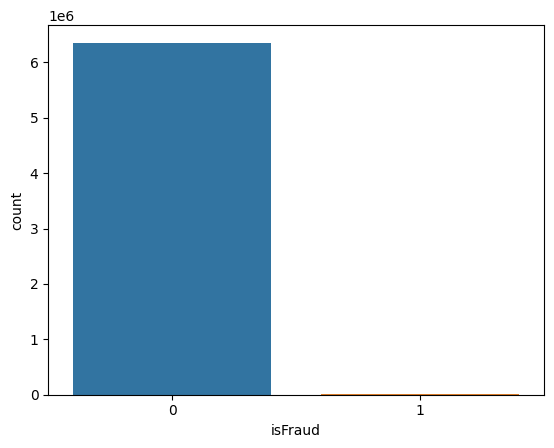

In [7]:
sns.countplot(x='isFraud',data=Fraud_data)

_Imbalance class present in dataset so **Random Forest** algorithm will be used to solve this Problem_

In [9]:
col_num=Fraud_data.select_dtypes(exclude=['object'])
print(col_num)

         step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     9839.64      170136.00       160296.36            0.00   
1           1     1864.28       21249.00        19384.72            0.00   
2           1      181.00         181.00            0.00            0.00   
3           1      181.00         181.00            0.00        21182.00   
4           1    11668.14       41554.00        29885.86            0.00   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13            0.00            0.00   
6362616   743  6311409.28     6311409.28            0.00            0.00   
6362617   743  6311409.28     6311409.28            0.00        68488.84   
6362618   743   850002.52      850002.52            0.00            0.00   
6362619   743   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFraud  isFlaggedFraud  
0                  0.00        0    

<Axes: >

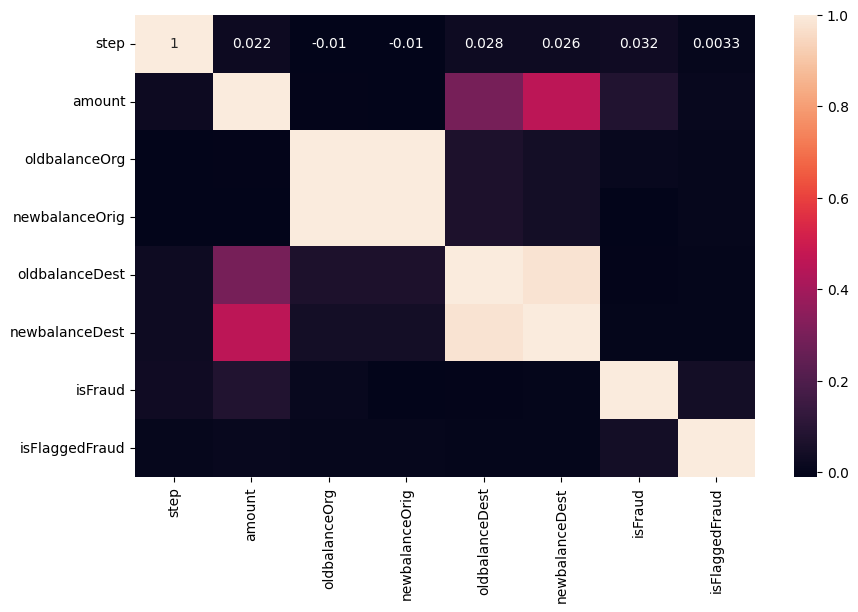

In [10]:
corr=col_num.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

**Ecoding the dataset to analize and mitigate multicollinearity** 

In [11]:
data_new=Fraud_data.copy()


In [12]:
obj_list=data_new.select_dtypes(include='object').columns
print(obj_list)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [13]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

for i in obj_list:
    data_new[i]=LE.fit_transform(data_new[i].astype(str))

In [14]:
data_new.info()
data_new.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.0,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.0,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.0,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.0,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.0,0.00,0,0
5,1,3,7817.71,6026525,53860.00,46042.29,2247218,0.0,0.00,0,0
6,1,3,7107.77,1805947,183195.00,176087.23,2063363,0.0,0.00,0,0
7,1,3,7861.64,2999171,176087.23,168225.59,2314008,0.0,0.00,0,0
8,1,3,4024.36,869140,2671.00,0.00,768940,0.0,0.00,0,0
9,1,2,5337.77,5407276,41720.00,36382.23,282960,41898.0,40348.79,0,0


**MULTICOLLINEARITY**

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(data_new)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


_Variables--> oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest have too high VIF.Inotherwords, they have high correlation.So, these variables will be combined and orignal variables will be removed from data_new.Also nameDest is connected to nameOrig._ 

In [16]:
data_new['Actual_amount_orig'] = data_new.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
data_new['Actual_amount_dest'] = data_new.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
data_new['TransactionPath'] = data_new.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
data_new = data_new.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameDest','nameOrig'],axis=1)

calc_vif(data_new)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<Axes: >

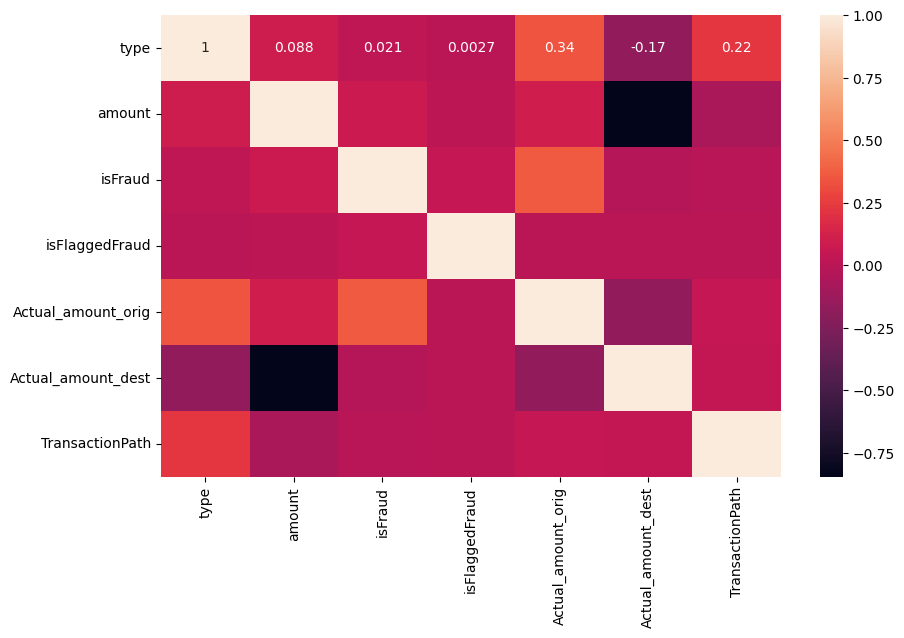

In [18]:
corr=data_new.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

# Model_Building #

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

<Axes: xlabel='amount', ylabel='isFraud'>

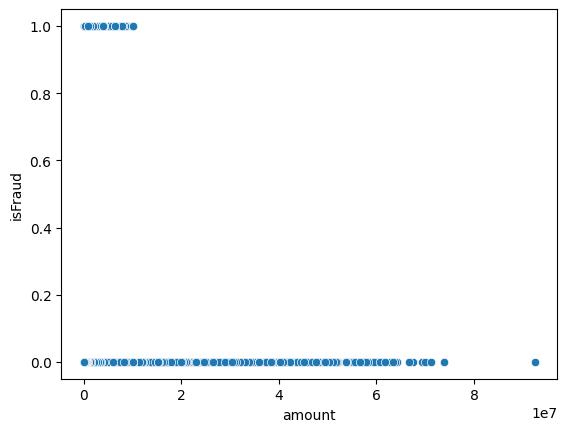

In [21]:
sns.scatterplot(x='amount',y='isFraud',data=data_new)

In [25]:
Fraud_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


**By observing amount variable (mean<median) it is evident that skweness is present in it so normalization is requried**

In [22]:
scaler = StandardScaler()
data_new["NormalizedAmount"] = scaler.fit_transform(data_new["amount"].values.reshape(-1, 1))
data_new.drop(["amount"], inplace= True, axis= 1)

Y = data_new["isFraud"]
X = data_new.drop(["isFraud"], axis= 1)

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)

Shape of X_train: (4453834, 6)
Shape of X_test: (1908786, 6)


In [39]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred_dt=decision_tree.predict(X_test)

decision_tree_score=decision_tree.score(X_test,Y_test)*100

In [36]:
random_forest=RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train,Y_train)
Y_pred_rf=random_forest.predict(X_test)

random_forest_score=random_forest.score(X_test,Y_test)*100

**Evaluation**

In [37]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.92330203595374
Random Forest Score:  99.95897916267198


In [40]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1905605     746]
 [    720    1715]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1906290      61]
 [    722    1713]]


In [41]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.70      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.97      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



**Random Forest has good precision and hence F1-Score, Random Forest comes out to be better as expected**

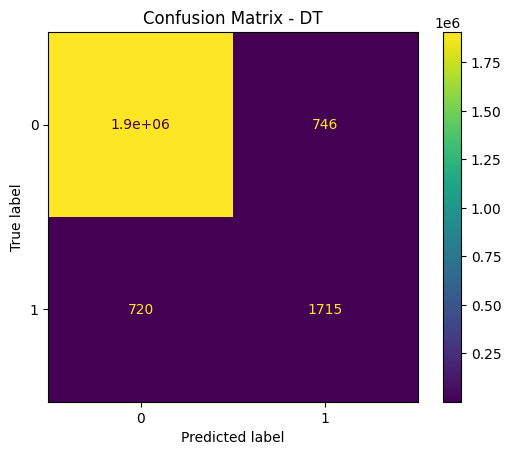

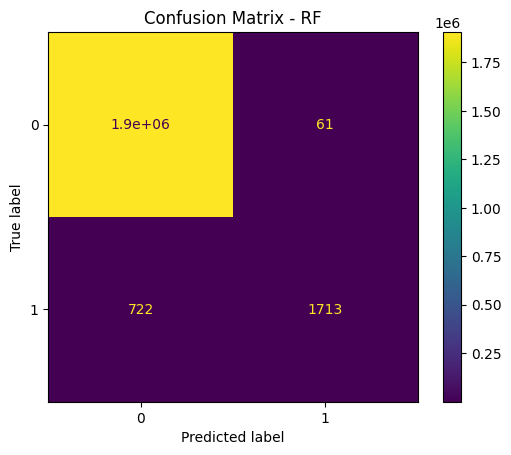

In [42]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

## End_Summary ##
In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.

.How did you select variables to be included in the model?
Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

.What are the key factors that predict fraudulent customer?
1. The source of request is secured or not ?
2. Is the name of organisation asking for money is legit or not ?
3. Transaction history of vendors.

.What kind of prevention should be adopted while company update its infrastructure?
1. Use smart vertified apps only.
2. Browse through secured websites.
3. Use secured internet connections (USE VPN).
4. Keep your mobile and laptop security updated.
5. Don't respond to unsolicited calls/SMS(s/E-mails.
6. If you feel like you have been tricked or security compromised, contact your bank immidiately.

.Assuming these actions have been implemented, how would you determine if they work?

1. Bank sending E-statements.
2. Customers keeping a check of their account activity.
3. Always keep a log of your payments.